In [17]:
#!pip install statsmodels

In [18]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [19]:
airline_data = pd.read_csv("flight_data.csv", low_memory = False)

In [20]:
df = airline_data.loc[~airline_data["DepDelay"].isnull(), ["DepDelay", "Reporting_Airline", "Origin"]]


In [21]:
top_50_airorts = df["Origin"].value_counts()[:50].index
df = df[df["Origin"].isin(top_50_airorts)]

In [22]:

# #df = make_data(stats.norm(0, 3).rvs(50))
# fit = smf.ols('DepDelay ~ Reporting_Airline + Origin', data=df).fit()
# fit.summary()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
#reg = LinearRegression().fit(X, y)

In [24]:
X = OneHotEncoder(drop='first').fit_transform(df[["Reporting_Airline", "Origin"]])
X

<1571080x81 sparse matrix of type '<class 'numpy.float64'>'
	with 3118939 stored elements in Compressed Sparse Row format>

In [25]:
X.toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
reg = LinearRegression().fit(X, df[["DepDelay"]])

$y_{delay} = \sum_{i \in Airports} a_ix_{flight} + \sum_{j \in Airlines} b_jx_{flight}$

In [27]:
reg.coef_

array([[-0.05733605, -1.12686019,  4.3748374 , -0.46051647,  1.83777578,
        -0.5191512 ,  0.01312118,  4.36345116,  2.22318665,  0.63622637,
         3.94589884, -3.62861865,  1.64986217, -2.1403295 , -1.89830374,
         0.39048765,  2.64758117, -1.45867448,  3.56058323,  0.50900655,
        -3.19025801,  2.50805518,  1.98019401,  0.46822779, -2.70810827,
         1.45692217, -1.00571761,  1.43922126,  3.25864881,  0.74853342,
         3.32030279, -0.55183076,  4.51370974,  0.11924754,  1.71364738,
         3.63772521,  3.26057565,  1.04289924,  3.99912148,  2.4324003 ,
         1.97430076,  1.49220178,  1.32744857,  3.94405793,  4.54357706,
         4.19490165,  6.78299023,  3.72993929, -0.5591199 ,  2.27304363,
         3.53574745,  2.65283621,  1.17404735,  5.79517959,  2.55459399,
         2.56615775,  4.16135584,  1.38677421,  2.76071732,  4.3764234 ,
         2.29769699,  4.95292515,  3.01212266,  0.90647404,  0.40236898,
         6.37644047,  0.51143521,  5.41589198,  1.6

In [28]:
cols = OneHotEncoder(drop='first').fit(df[["Reporting_Airline", "Origin"]]).get_feature_names_out()

In [29]:
cols

array(['Reporting_Airline_AA', 'Reporting_Airline_AS',
       'Reporting_Airline_B6', 'Reporting_Airline_CO',
       'Reporting_Airline_DH', 'Reporting_Airline_DL',
       'Reporting_Airline_EA', 'Reporting_Airline_EV',
       'Reporting_Airline_F9', 'Reporting_Airline_FL',
       'Reporting_Airline_G4', 'Reporting_Airline_HA',
       'Reporting_Airline_HP', 'Reporting_Airline_KH',
       'Reporting_Airline_ML (1)', 'Reporting_Airline_MQ',
       'Reporting_Airline_NK', 'Reporting_Airline_NW',
       'Reporting_Airline_OH', 'Reporting_Airline_OO',
       'Reporting_Airline_PA (1)', 'Reporting_Airline_PI',
       'Reporting_Airline_PS', 'Reporting_Airline_TW',
       'Reporting_Airline_TZ', 'Reporting_Airline_UA',
       'Reporting_Airline_US', 'Reporting_Airline_VX',
       'Reporting_Airline_WN', 'Reporting_Airline_XE',
       'Reporting_Airline_YV', 'Reporting_Airline_YX', 'Origin_ATL',
       'Origin_AUS', 'Origin_BNA', 'Origin_BOS', 'Origin_BWI',
       'Origin_CLE', 'Origin_CLT', 

In [30]:
reg.coef_.shape

(1, 81)

In [31]:
lin_reg_coefs = pd.DataFrame({"name": cols, "coef": reg.coef_[0]})

In [32]:
lin_reg_coefs["category"] = lin_reg_coefs["name"].str.contains("Origin").replace({True: "Airport", False: "Airline"})
lin_reg_coefs

,name,coef,category
0,Reporting_Airline_AA,-0.057336,Airline
1,Reporting_Airline_AS,-1.126860,Airline
2,Reporting_Airline_B6,4.374837,Airline
3,Reporting_Airline_CO,-0.460516,Airline
4,Reporting_Airline_DH,1.837776,Airline
...,...,...,...
76,Origin_SLC,0.522153,Airport
77,Origin_SMF,0.050975,Airport
78,Origin_SNA,0.183653,Airport
79,Origin_STL,2.709209,Airport


In [33]:
import seaborn as sns

<Axes: xlabel='coef', ylabel='Percent'>

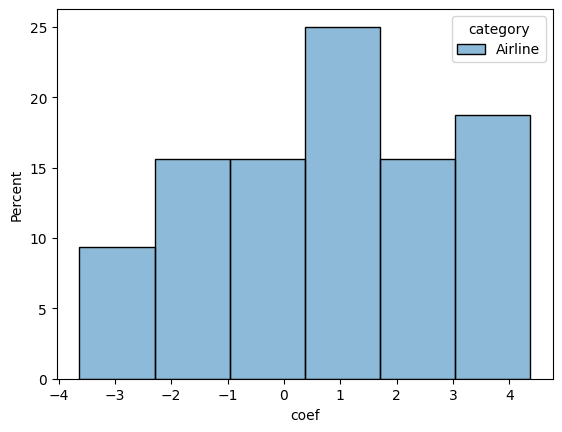

In [34]:
sns.histplot(data=lin_reg_coefs[lin_reg_coefs["category"] == "Airline"], x="coef", hue="category", stat="percent")

<Axes: xlabel='coef', ylabel='Percent'>

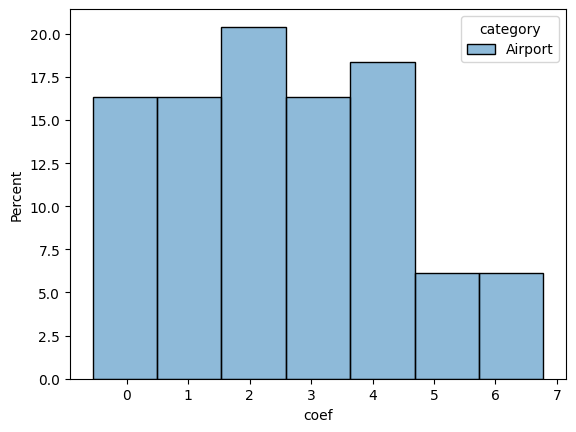

In [35]:
sns.histplot(data=lin_reg_coefs[lin_reg_coefs["category"] == "Airport"], x="coef", hue="category", stat="percent")

In [36]:
lin_reg_coefs["abs coef"] = np.abs(lin_reg_coefs["coef"])

<Axes: xlabel='abs coef', ylabel='Percent'>

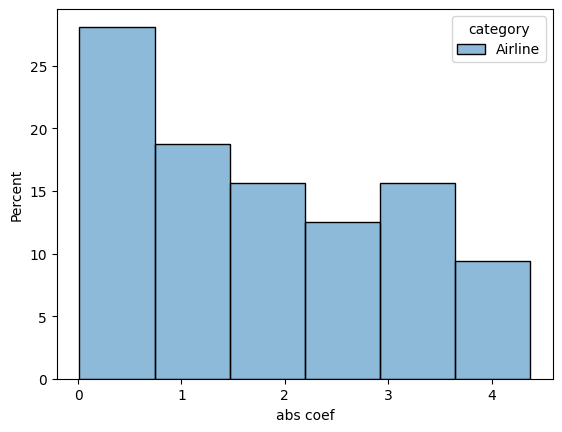

In [37]:
sns.histplot(data=lin_reg_coefs[lin_reg_coefs["category"] == "Airline"], x="abs coef", hue="category", stat="percent")

<Axes: xlabel='abs coef', ylabel='Percent'>

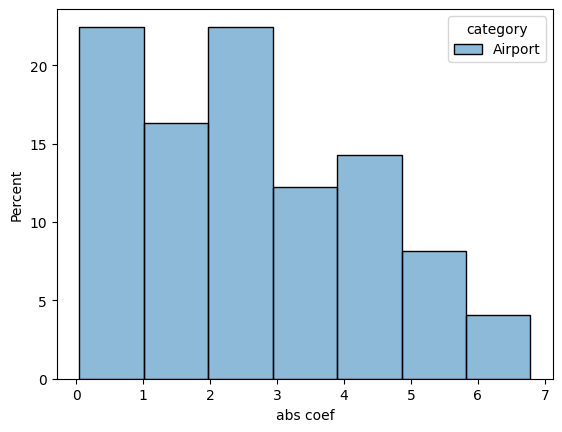

In [38]:
sns.histplot(data=lin_reg_coefs[lin_reg_coefs["category"] == "Airport"], x="abs coef", hue="category", stat="percent")

# Hypothesis Testing

# Question 1)
Among all airports and airlines, do airports or airlines have a larger influnce on delays

null: adverage coef of airports is the same as the adverage coef of airlines
Alternative: adverage coef of airports is greater than the adverage coef of airlines

In [39]:
airline_data = pd.read_csv("flight_data.csv", low_memory = False)
df = airline_data.loc[~airline_data["DepDelay"].isnull(), ["DepDelay", "Reporting_Airline", "Origin"]]

X = OneHotEncoder(drop='first').fit_transform(df[["Reporting_Airline", "Origin"]])
reg = LinearRegression().fit(X, df[["DepDelay"]])
cols = OneHotEncoder(drop='first').fit(df[["Reporting_Airline", "Origin"]]).get_feature_names_out()
lin_reg_coefs = pd.DataFrame({"name": cols, "coef": reg.coef_[0]})
lin_reg_coefs["category"] = lin_reg_coefs["name"].str.contains("Origin").replace({True: "Airport", False: "Airline"})
lin_reg_coefs

,name,coef,category
0,Reporting_Airline_AA,-0.069569,Airline
1,Reporting_Airline_AS,-1.029725,Airline
2,Reporting_Airline_B6,4.661522,Airline
3,Reporting_Airline_CO,-0.424763,Airline
4,Reporting_Airline_DH,1.722580,Airline
...,...,...,...
432,Origin_XWA,-14.188019,Airport
433,Origin_YAK,-5.644320,Airport
434,Origin_YAP,-6.364347,Airport
435,Origin_YKM,-8.912375,Airport


In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

xy_object = sm.stats.CompareMeans(
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "coef"]), 
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "coef"])
)

sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal')
print(f'Statsmodels api: {sm_result}')

Statsmodels api: (-0.05581475934766633, 2.923180199342047)


In [41]:
xy_object.tconfint_diff(alpha=0.05, usevar='unequal', alternative="larger")

(0.18536963518433547, inf)

In [42]:
xy_object.tconfint_diff(alpha=0.05, usevar='unequal', alternative="smaller")

(-inf, 2.681995804810045)

# Permutation Experiment

In [43]:
lin_reg_coefs[["category", "coef"]].groupby("category").mean()

,coef
category,
Airline,0.712915
Airport,-0.720768


In [44]:
def run_permutation(df, category="category", operation=lambda x, y: 0, n=1000):
    random_df = df.copy(deep=True)
    sample_stat = operation(df, category)
    sim_stats = []
    for _ in range(1000):
        random_df["simulated"] = random_df[category].sample(frac=1).reset_index(drop=True)
        random_df
        sim_stats.append(
            operation(random_df.drop(category, axis=1), "simulated")
        )
    return np.array(sim_stats), sample_stat

diff_means = lambda df, category: df.groupby(category).mean().diff().iloc[1, 0]
sim_stats, sample_stat = run_permutation(lin_reg_coefs[["category", "coef"]], category="category", operation=diff_means, n=1000)

In [45]:
sim_stats, sample_stat

(array([-1.28821223e+00,  1.94261414e+00, -8.66424635e-01,  2.12550206e+00,
         2.84403400e+00,  6.32050708e-01, -2.58276390e+00, -2.31613591e-02,
         2.35098038e+00,  5.17128120e-01,  1.15613333e-01,  1.24262536e+00,
         1.55227051e+00,  8.68894333e-01, -7.58472463e+00, -8.91541116e-01,
         2.45783457e+00,  1.53040958e+00, -2.08341525e-01, -1.48269308e+00,
        -1.30993494e+00, -9.24984431e-02, -1.75461606e+00,  1.50462357e+00,
        -4.09172339e+00, -1.00349480e+00, -2.27267389e+00,  6.77283661e-01,
         1.41449075e+00,  7.43256545e-01,  1.29852074e+00,  2.12738450e+00,
        -9.40612764e+00, -7.37346332e-01, -2.51125707e+00, -5.98283224e-01,
         1.35849077e+00,  6.16338678e-01,  7.41686915e-01, -1.71419740e+00,
        -1.16062814e+00,  1.72246428e+00, -2.46802781e-01,  2.14607754e+00,
         2.64514331e+00, -5.00481839e+00, -1.43014772e+00, -2.91985788e+00,
         2.37018645e+00,  1.59933307e+00,  2.10330093e+00, -3.25222763e+00,
         3.6

In [46]:
np.sum(sample_stat > sim_stats)

244

# Influnce

In [47]:
airline_data = pd.read_csv("flight_data.csv", low_memory = False)
df = airline_data.loc[~airline_data["DepDelay"].isnull(), ["DepDelay", "Reporting_Airline", "Origin"]]

X = OneHotEncoder(drop='first').fit_transform(df[["Reporting_Airline", "Origin"]])
reg = LinearRegression().fit(X, df[["DepDelay"]])
cols = OneHotEncoder(drop='first').fit(df[["Reporting_Airline", "Origin"]]).get_feature_names_out()
lin_reg_coefs = pd.DataFrame({"name": cols, "coef": reg.coef_[0]})
lin_reg_coefs["category"] = lin_reg_coefs["name"].str.contains("Origin").replace({True: "Airport", False: "Airline"})
lin_reg_coefs["abs coef"] = np.abs(lin_reg_coefs["coef"])

xy_object = sm.stats.CompareMeans(
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"]), 
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"])
)

sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal'), 
sm_result

((-4.949852374861677, -2.558066363521406),)

In [48]:
sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal', alternative="larger"), 
sm_result

((-4.756756111851738, inf),)

In [49]:
sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal', alternative="smaller"), 
sm_result

((-inf, -2.751162626531346),)

In [50]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"], 
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"], 
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=6.174076074024613, pvalue=9.352199563542947e-10)

In [51]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "coef"], 
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "coef"], 
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=-1.897555702482134, pvalue=0.970430453790775)

In [52]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "coef"],
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "coef"], 
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=1.897555702482134, pvalue=0.029569546209225035)

# Top 50 Airports instead

In [53]:
airline_data = pd.read_csv("flight_data.csv", low_memory = False)
df = airline_data.loc[~airline_data["DepDelay"].isnull(), ["DepDelay", "Reporting_Airline", "Origin"]]
df = df[df["Origin"].isin(top_50_airorts)]

X = OneHotEncoder(drop='first').fit_transform(df[["Reporting_Airline", "Origin"]])
reg = LinearRegression().fit(X, df[["DepDelay"]])
cols = OneHotEncoder(drop='first').fit(df[["Reporting_Airline", "Origin"]]).get_feature_names_out()
lin_reg_coefs = pd.DataFrame({"name": cols, "coef": reg.coef_[0]})
lin_reg_coefs["category"] = lin_reg_coefs["name"].str.contains("Origin").replace({True: "Airport", False: "Airline"})
lin_reg_coefs["abs coef"] = np.abs(lin_reg_coefs["coef"])

xy_object = sm.stats.CompareMeans(
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"]), 
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"])
)

sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal'), 
sm_result

((-1.408646601480585, -0.039375035156336224),)

In [54]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"], 
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"], 
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=2.1054667053565983, pvalue=0.019240301312312455)

In [55]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "coef"], 
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "coef"],
    
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=3.9536252876070623, pvalue=0.00010613206757001293)

# Looking only at positive delays

In [56]:
airline_data = pd.read_csv("flight_data.csv", low_memory = False)
df = airline_data.loc[~airline_data["DepDelay"].isnull(), ["DepDelay", "Reporting_Airline", "Origin"]]
df = df[df["DepDelay"] > 0]

X = OneHotEncoder(drop='first').fit_transform(df[["Reporting_Airline", "Origin"]])
reg = LinearRegression().fit(X, df[["DepDelay"]])
cols = OneHotEncoder(drop='first').fit(df[["Reporting_Airline", "Origin"]]).get_feature_names_out()
lin_reg_coefs = pd.DataFrame({"name": cols, "coef": reg.coef_[0]})
lin_reg_coefs["category"] = lin_reg_coefs["name"].str.contains("Origin").replace({True: "Airport", False: "Airline"})
lin_reg_coefs["abs coef"] = np.abs(lin_reg_coefs["coef"])

xy_object = sm.stats.CompareMeans(
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"]), 
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"])
)

sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal'), 
sm_result

((-10.900135613497705, -1.7793544242020456),)

In [57]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"], 
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"], 
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=2.7407357836194706, pvalue=0.00333334507493716)

In [58]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "coef"], 
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "coef"],
    
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=3.4681831539102417, pvalue=0.00033677912610209214)

In [59]:
lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"].mean(), lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"].mean()

(-0.6968051901721958, -10.10336755342333)

In [60]:
lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"].mean(), lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"].mean()

(18.117761237183466, 11.778016218333594)